In [2]:
import pandas as pd
import numpy as np
import scipy
import datetime
import numexpr
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose 
from sklearn.metrics import mean_squared_error, r2_score
from math import * 

In [3]:
watch_tv=pd.read_csv('data/watch_tv.csv')
watch_tv

,Unnamed: 0,Datetime,Sensor,State,Activity,Note
0,0,2009-02-02 11:41:34,M07,ON,Watch_TV,begin
1,1,2009-02-02 12:31:02,M23,ON,Watch_TV,end
2,2,2009-02-03 18:01:23,M08,ON,Watch_TV,begin
3,3,2009-02-03 19:10:23,M07,ON,Watch_TV,end
4,4,2009-02-04 17:15:29,M08,ON,Watch_TV,begin
...,...,...,...,...,...,...
57,57,2009-04-02 13:04:07,M08,OFF,Watch_TV,end
58,58,2009-04-03 10:58:52,M07,ON,Watch_TV,begin
59,59,2009-04-03 11:27:07,M02,OFF,Watch_TV,end
60,60,2009-04-03 12:20:04,M04,ON,Watch_TV,begin


In [4]:
R1_work=pd.read_csv('data/R1work_data1.csv')
R1_sleep=pd.read_csv('data/R1_sleep_data.csv')

In [5]:
list1=[]
list2=[]
for i in range(0,len(watch_tv)):
    if(i%2==1):
        for j in range(0,len(R1_work),2):
            if watch_tv.loc[i]['Datetime'][0:10] ==  R1_work.loc[j]['Datetime'][0:10]:
                hour1 = abs(datetime.datetime.strptime(R1_work.loc[j]['Datetime'],'%Y-%m-%d %H:%M:%S')-datetime.datetime.strptime(watch_tv.loc[i]['Datetime'],'%Y-%m-%d %H:%M:%S'))
                if hour1 <= datetime.timedelta(seconds=1800) and hour1 >= datetime.timedelta(seconds=60):
                    list1.append(hour1)
    if(i%2==0):
        for k in range(1,len(R1_work),2):
            if watch_tv.loc[i]['Datetime'][0:10] ==  R1_work.loc[k]['Datetime'][0:10]:
                hour2 = abs(datetime.datetime.strptime(R1_work.loc[k]['Datetime'],'%Y-%m-%d %H:%M:%S')-datetime.datetime.strptime(watch_tv.loc[i]['Datetime'],'%Y-%m-%d %H:%M:%S'))
                if hour2 <= datetime.timedelta(seconds=1800) and hour2 >= datetime.timedelta(seconds=60):
                    list2.append(hour2)
    

In [6]:
list1

[datetime.timedelta(seconds=891),
 datetime.timedelta(seconds=560),
 datetime.timedelta(seconds=238),
 datetime.timedelta(seconds=102)]

In [7]:
list2

[]

In [8]:
list3=[]
list4=[]
for i in range(0,len(watch_tv)):
    if(i%2==1):
        for j in range(0,len(R1_sleep),2):
            if watch_tv.loc[i]['Datetime'][0:10] ==  R1_sleep.loc[j]['Datetime'][0:10]:
                hour3 = abs(datetime.datetime.strptime(R1_sleep.loc[j]['Datetime'],'%Y-%m-%d %H:%M:%S')-datetime.datetime.strptime(watch_tv.loc[i]['Datetime'],'%Y-%m-%d %H:%M:%S'))
                if hour3 <= datetime.timedelta(seconds=1800) and hour3 >= datetime.timedelta(seconds=60):
                    list3.append(hour3)
    if(i%2==0):
        for k in range(1,len(R1_sleep),2):
            if watch_tv.loc[i]['Datetime'][0:10] ==  R1_sleep.loc[k]['Datetime'][0:10]:
                hour4 = abs(datetime.datetime.strptime(R1_sleep.loc[k]['Datetime'],'%Y-%m-%d %H:%M:%S')-datetime.datetime.strptime(watch_tv.loc[i]['Datetime'],'%Y-%m-%d %H:%M:%S'))
                if hour4 <= datetime.timedelta(seconds=1800) and hour4 >= datetime.timedelta(seconds=60):
                    list4.append(hour4)    

In [9]:
R1_heal=pd.read_csv('data/R1_heal.csv')  
Meal=pd.read_csv('data/meal.csv')
list3

[]

In [10]:
list4

[]

In [11]:
time1=[]
#洗漱结束 做饭开始 做饭➖洗漱
for i in range(0,len(R1_heal)):
    if(i%2==1):
        for j in range(0,len(Meal),2):
            if R1_heal.loc[i]['Datetime'][0:10] ==  Meal.loc[j]['Datetime'][0:10]:
                t1 = datetime.datetime.strptime(Meal.loc[j]['Datetime'],'%Y-%m-%d %H:%M:%S')-datetime.datetime.strptime(R1_heal.loc[i]['Datetime'],'%Y-%m-%d %H:%M:%S')
                if t1 <= datetime.timedelta(seconds=1800) and t1 >= datetime.timedelta(seconds=60):
                    time1.append(t1)

In [12]:
time1.sort()
len(time1)

23

In [13]:
time1

[datetime.timedelta(seconds=167),
 datetime.timedelta(seconds=313),
 datetime.timedelta(seconds=327),
 datetime.timedelta(seconds=356),
 datetime.timedelta(seconds=397),
 datetime.timedelta(seconds=407),
 datetime.timedelta(seconds=412),
 datetime.timedelta(seconds=416),
 datetime.timedelta(seconds=440),
 datetime.timedelta(seconds=473),
 datetime.timedelta(seconds=475),
 datetime.timedelta(seconds=498),
 datetime.timedelta(seconds=525),
 datetime.timedelta(seconds=588),
 datetime.timedelta(seconds=599),
 datetime.timedelta(seconds=667),
 datetime.timedelta(seconds=684),
 datetime.timedelta(seconds=716),
 datetime.timedelta(seconds=807),
 datetime.timedelta(seconds=849),
 datetime.timedelta(seconds=1197),
 datetime.timedelta(seconds=1261),
 datetime.timedelta(seconds=1527)]

In [14]:
time2=[]
for i in range(0,len(Meal)):
     if(i%2==1):#做饭结束 开始工作
        for j in range(0,len(R1_work),2):
            if Meal.loc[i]['Datetime'][0:10] ==  R1_work.loc[j]['Datetime'][0:10]:
                t2 = datetime.datetime.strptime(R1_work.loc[j]['Datetime'],'%Y-%m-%d %H:%M:%S')-datetime.datetime.strptime(Meal.loc[i]['Datetime'],'%Y-%m-%d %H:%M:%S')
                if t2 <= datetime.timedelta(seconds=1800) and t2 >= datetime.timedelta(seconds=60):
                    time2.append(t2)

In [15]:
time2

[datetime.timedelta(seconds=202),
 datetime.timedelta(seconds=508),
 datetime.timedelta(seconds=1679),
 datetime.timedelta(seconds=1768),
 datetime.timedelta(seconds=833),
 datetime.timedelta(seconds=136),
 datetime.timedelta(seconds=572),
 datetime.timedelta(seconds=1480),
 datetime.timedelta(seconds=674),
 datetime.timedelta(seconds=701),
 datetime.timedelta(seconds=479),
 datetime.timedelta(seconds=257),
 datetime.timedelta(seconds=143)]

In [16]:
time3=[]
for i in range(0,len(Meal)):
    if(i%2==0):#做饭开始 工作结束
        for j in range(1,len(R1_work),2):
            if Meal.loc[i]['Datetime'][0:10] ==  R1_work.loc[j]['Datetime'][0:10]:
                t3 = datetime.datetime.strptime(Meal.loc[i]['Datetime'],'%Y-%m-%d %H:%M:%S')-datetime.datetime.strptime(R1_work.loc[j]['Datetime'],'%Y-%m-%d %H:%M:%S')
                if t3 <= datetime.timedelta(seconds=1800) and t3 >= datetime.timedelta(seconds=60):
                    time3.append(t3)

In [17]:
time3

[datetime.timedelta(seconds=597),
 datetime.timedelta(seconds=782),
 datetime.timedelta(seconds=61),
 datetime.timedelta(seconds=182),
 datetime.timedelta(seconds=317),
 datetime.timedelta(seconds=217),
 datetime.timedelta(seconds=381),
 datetime.timedelta(seconds=980),
 datetime.timedelta(seconds=84),
 datetime.timedelta(seconds=768),
 datetime.timedelta(seconds=1397),
 datetime.timedelta(seconds=666)]

In [18]:
time2.sort()
len(time2)

13

In [19]:
time3.sort()
time3

[datetime.timedelta(seconds=61),
 datetime.timedelta(seconds=84),
 datetime.timedelta(seconds=182),
 datetime.timedelta(seconds=217),
 datetime.timedelta(seconds=317),
 datetime.timedelta(seconds=381),
 datetime.timedelta(seconds=597),
 datetime.timedelta(seconds=666),
 datetime.timedelta(seconds=768),
 datetime.timedelta(seconds=782),
 datetime.timedelta(seconds=980),
 datetime.timedelta(seconds=1397)]

In [20]:
list=(list1+list2+list3+list4+time1+time2+time3)
list.sort()


In [21]:
len(list)

52

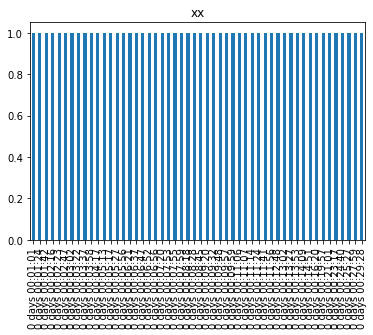

In [22]:
dict1=pd.value_counts(list)   
dict1=dict1.sort_index()
dict1.plot(kind='bar')
plt.title('xx')
plt.show()

In [23]:
name = ['Costtime']
test=pd.DataFrame(columns=name,data=list)
test.to_csv('data/testcsv.csv',encoding='gbk')

In [24]:
staTime=pd.read_csv('data/testcsv.csv') 
staTime.count()

Unnamed: 0    52
Costtime      52
dtype: int64

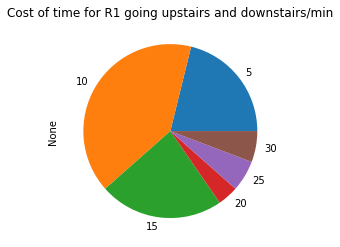

In [25]:
scount=int(0)
slist=[]
for i in range(0,len(staTime)):
    if int(staTime.loc[i]['Costtime'][10])==0 and int(staTime.loc[i]['Costtime'][11])<5:
        scount=5
    if int(staTime.loc[i]['Costtime'][10])==0 and int(staTime.loc[i]['Costtime'][11])>=5 and int(staTime.loc[i]['Costtime'][11])<=9:
        scount=10;
    if int(staTime.loc[i]['Costtime'][10])==1 and int(staTime.loc[i]['Costtime'][11])<5:
        scount=15;
    if int(staTime.loc[i]['Costtime'][10])==1 and int(staTime.loc[i]['Costtime'][11])>=5 and int(staTime.loc[i]['Costtime'][11])<=9:
        scount=20;
    if int(staTime.loc[i]['Costtime'][10])==2 and int(staTime.loc[i]['Costtime'][11])<5:
        scount=25;
    if int(staTime.loc[i]['Costtime'][10])==2 and int(staTime.loc[i]['Costtime'][11])>=5 and int(staTime.loc[i]['Costtime'][11])<=9:
        scount=30
    slist.append(scount)
dict1=pd.value_counts(slist)   
dict1=dict1.sort_index()
plt.title('Cost of time for R1 going upstairs and downstairs/min')
dict1.plot(kind='pie')
plt.show()